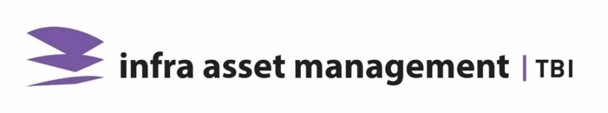

In [4]:
import os
import json
import asyncio

import traitlets

import numpy as np
import pandas as pd

import ipywidgets as widgets 
from ipywidgets import interact, interact_manual, Layout

import time
from datetime import datetime, timedelta

from storingsanalyse import StoringsAnalyse
from storingsanalyse_v2 import StoringsAnalyse as StoringsAnalyseV2
from text_writer import DocumentGeneratorCoentunnel

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

from IPython.display import Markdown, Latex

# Class zorgt ervoor dat een waarde meegegeven kan worden aan een Button
import traitlets
class LoadedButton(widgets.Button):
    """A button that can holds a value as a attribute."""

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))


# Aparte functie voor het wachten op verandering (aka input van de ME)
def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
        # we need to free up the binding to getvalue to avoid an InvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    widget.on_click(getvalue)
    return future

# Lege variabele voor class instance
sa = 0

# Storingsanalyse

In [5]:
input_project = widgets.Dropdown(
    options=["Coentunnel-tracé", "Sluis Eefde"],
    value="Coentunnel-tracé",
    description='Project:',
    disabled=False)

input_rapport_type = widgets.Dropdown(
    options=["Kwartaalrapportage", "Jaarrapportage"],
    description='Rapport type:',
    disabled=False)

input_quarter = widgets.Dropdown(
    options=["n.v.t.", "Q1", "Q2", "Q3", "Q4"],
    description='Kwartaal:',
    disabled=False)

input_api_key = widgets.Text(
    value='bWF4YWRtaW46R21iQ1dlbkQyMDE5',
    placeholder='Type something',
    description='API key:',
    disabled=False,
    layout=Layout(width='50%'))

input_path_staging_file = widgets.Text(
    placeholder='Path to the Staging File',
    value='..\\staging file\\validating_input_data.xlsx',
    description='Pad naar Staging File:',
    disabled=False,
    layout=Layout(width='50%'))

display(input_project, input_rapport_type, input_quarter, input_api_key, input_path_staging_file)

Dropdown(description='Project:', options=('Coentunnel-tracé', 'Sluis Eefde'), value='Coentunnel-tracé')

Dropdown(description='Rapport type:', options=('Kwartaalrapportage', 'Jaarrapportage'), value='Kwartaalrapport…

Dropdown(description='Kwartaal:', options=('n.v.t.', 'Q1', 'Q2', 'Q3', 'Q4'), value='n.v.t.')

Text(value='bWF4YWRtaW46R21iQ1dlbkQyMDE5', description='API key:', layout=Layout(width='50%'), placeholder='Ty…

Text(value='..\\staging file\\validating_input_data.xlsx', description='Pad naar Staging File:', layout=Layout…

In [6]:
dg = DocumentGeneratorCoentunnel(project=input_project.value, 
                         rapport_type=input_rapport_type.value, 
                         quarter=input_quarter.value,
                         year=datetime.now().year,
                         api_key=input_api_key.value, 
                         path_to_staging_file=input_path_staging_file.value)
dg.build_full_document()

In [6]:
# """
# De inhoud van deze cell bevat de code voor een generator. Om de generator te kunnen gebruiken op een manier waarbij de
# code wacht op input van de gebruiker, moet alle code worden toegevoegd aan de asynchone functie na de await keyword.
# Ter behoeven van de leesbaarheid kan dit ook gedaan worden met behulp van een extra class die een rapport kan maken op 
# basis van de input parameters.
# """

# # Instance van LoadedButton
# button_description = 'Generate docuements'

# button = LoadedButton(description=button_description, value=False, layout=Layout(width='25%'))
# loop = asyncio.get_event_loop()

# async def gen_start():
#     print('Please insert input parameters.')
#     print(f"Click '{button_description}' to generate the documents.")
#     start = await wait_for_change(button)  # Wachter gebeurt o.a. hierdoor 
#     print('starting')
#     dg = DocumentGeneratorCoentunnel(project=input_project.value, 
#                                      rapport_type=input_rapport_type.value, 
#                                      quarter=input_quarter.value,
#                                      year=datetime.now().year,
#                                      api_key=input_api_key.value, 
#                                      path_to_staging_file=input_path_staging_file.value)
#     # onderdaande misschien combineren met een log functie o.i.d.
#     print('Generating documents')
#     dg.build_full_document()
    
    
# # Starting function and displaying button
# loop.create_task(gen_start())
# display(button)

LoadedButton(description='Generate docuements', layout=Layout(width='25%'), style=ButtonStyle())

Please insert input parameters.
Click 'Generate docuements' to generate the documents.
